In [57]:
### subroutine to plot the model as a grid
import matplotlib.pyplot as plt

def plot_grid(name):
    plt.rcParams['figure.figsize'] = [4,4]  ## sets the size of the image

    fig, ax = plt.subplots()
    ax.imshow(name)

    # Set ticks and labels 
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # add grid lines  
    ax.grid(color='black', linewidth=0.3)
    plt.show()
    return

[[[0.         0.4        0.8       ]
  [0.         0.4        0.8       ]
  [0.         0.4        0.8       ]
  [0.         0.4        0.8       ]]

 [[0.         0.4        0.8       ]
  [0.         0.4        0.8       ]
  [0.76862745 0.94509804 0.96078431]
  [0.         0.4        0.8       ]]

 [[0.4        0.2        0.        ]
  [0.         0.4        0.8       ]
  [0.         0.4        0.8       ]
  [0.         0.4        0.8       ]]

 [[0.         0.4        0.8       ]
  [0.         0.4        0.8       ]
  [0.         0.4        0.8       ]
  [0.         0.4        0.8       ]]]
initial temperature anomaly:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


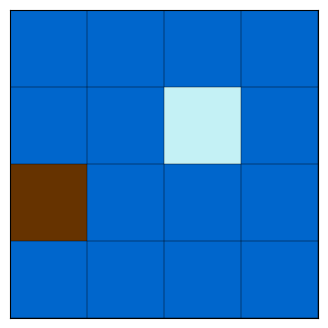

In [58]:
## 
import matplotlib.pyplot as plt
import numpy as np
##############################################################  setup


n=4 ## number of grid points is n*n

ocean=np.array([0/255,102/255,204/255])   
shallowocean =np.array([102/255,178/255,255/255])
glacier=np.array([196/255,241/255,245/255]) ## ice on land (glacier)
icefloat=np.array([0.9,0.9,1])  ## sea ice  
land=np.array([102/255,51/255,0/255]) 
lowland=np.array([255/255,178/255,102/255])
destroyedland=np.array([1,0,0]) # for later

geography={'ocean':ocean,'shallowocean':shallowocean,'glacier':glacier,'icefloat':icefloat,\
      'land':land,'lowland':lowland}

######################################  initiaize model (geography)
background=[[ocean]*n]*n
grid_colours=background.copy()
clim_model=np.array(grid_colours)  ## initializes the model to all ocean

clim_model[1,2]=glacier
clim_model[2,0]=land
print(clim_model)

model_over_time=[]
model_over_time.append(clim_model)

######################################  initialize temperature

init_temperature=np.array([[0]*n]*n)
print("initial temperature anomaly:\n", init_temperature)
temp_over_time=[]
temp_over_time.append(init_temperature)



######################################  plot
plot_grid(clim_model)


In [59]:
def what_is(x,y):  ##inquires about the colour (nature) of a cell in the model grid
    for k,v in geography.items():
        if np.all(clim_model[x,y]==np.array(v)):
            whatis=k
    return whatis

print(what_is(2,2))
print(what_is(1,2))
print(what_is(3,3))

ocean
glacier
ocean


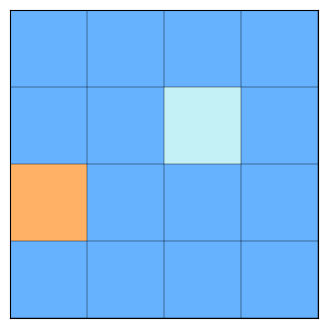

In [60]:
for i in range(n):
    for j in range(n):
        g=what_is(i,j)
        if g=='land':
            clim_model[i,j]=lowland
        elif g=='ocean':
            clim_model[i,j]=shallowocean

##########  plotting
fig, ax = plt.subplots()
ax.imshow(clim_model)

# Set ticks and labels (not really needed)
ax.set_xticks(np.arange(0.5, n, 1))
ax.set_yticks(np.arange(0.5, n, 1))
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
# add grid lines  
ax.grid(color='black', linewidth=0.3)
plt.show()            
    